#step 1: import the necessary libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Using TensorFlow backend.


#step 2: create the model

In [2]:
model = Sequential()
# block 1
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# block 2
model.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# block 3
model.add(Conv2D(128, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model   
model.compile(loss='binary_crossentropy',
            optimizer=Adam(lr=0.00001),
            metrics=['accuracy'])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)             0         
__________

#step 3: load the data

In [4]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'dataset/valid',
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


#step 4: train the model 

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps= validation_generator.samples // batch_size,
        callbacks = [ModelCheckpoint('classification.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')])

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#step 5: testing 

In [5]:
def get_label(s):
    for key in validation_generator.class_indices:
        if int(s) == validation_generator.class_indices[key]:
            return key

In [6]:
model.load_weights('classification.h5')

In [7]:
batch_size = 16

test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'dataset/valid',
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='binary')

Found 5000 images belonging to 2 classes.


In [8]:
test_im, test_lbl = validation_generator.next()
predections = model.predict_classes(test_im)

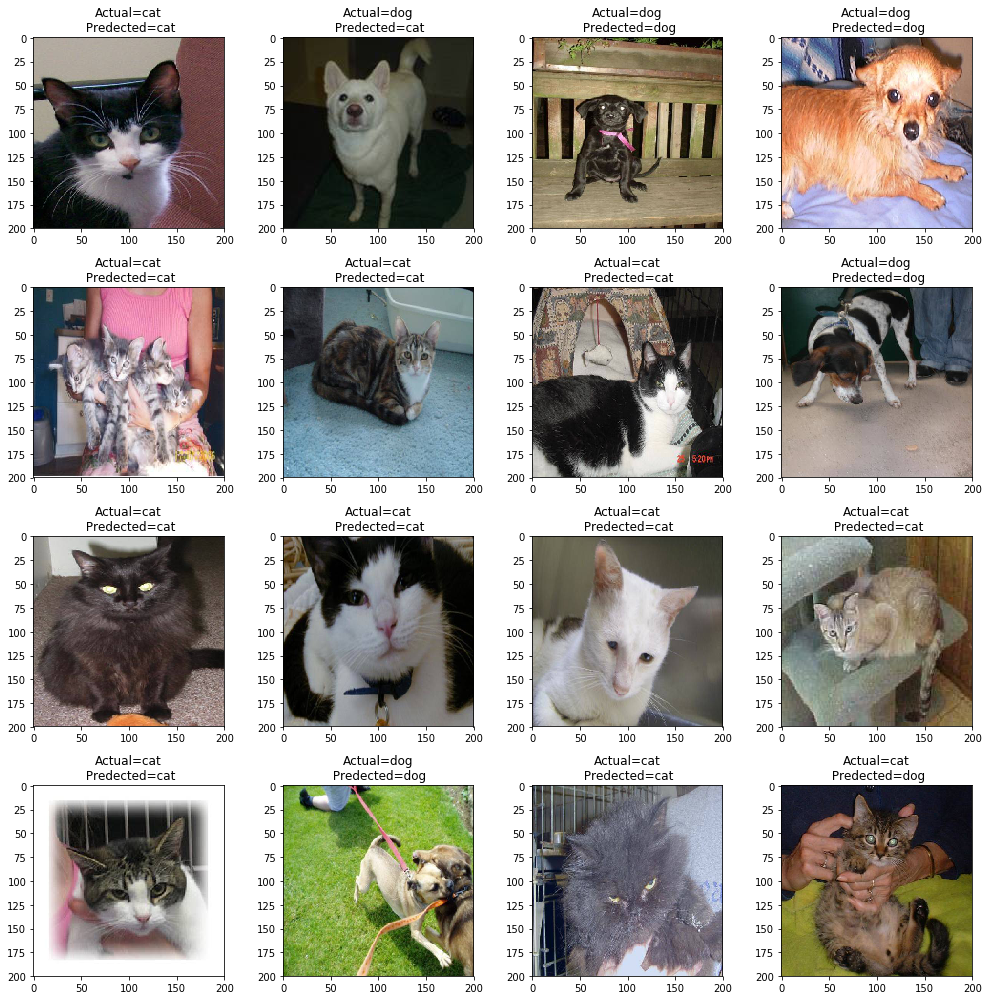

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 14))

for i in range(len(test_im)):
    plt.subplot(4, 4, (i+1))
    plt.title('Actual='+str(get_label(test_lbl[i])) + '\n Predected=' + get_label(predections[i][0]))
    plt.imshow(test_im[i])

fig.tight_layout()
plt.show()